In [10]:
import urllib.request 
import json 
import pandas as pd 
from pandas.io.json import json_normalize

In [2]:
url = "http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/20220301"

In [3]:
response = urllib.request.urlopen("http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/20220301") 
json_str = response.read().decode("utf-8")

In [4]:
json_object = json.loads(json_str)

In [5]:
json_object

{'CardSubwayStatsNew': {'list_total_count': 593,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '서울역',
    'RIDE_PASGR_NUM': 20994.0,
    'ALIGHT_PASGR_NUM': 19468.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '시청',
    'RIDE_PASGR_NUM': 12439.0,
    'ALIGHT_PASGR_NUM': 12379.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종각',
    'RIDE_PASGR_NUM': 15750.0,
    'ALIGHT_PASGR_NUM': 13544.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종로3가',
    'RIDE_PASGR_NUM': 16349.0,
    'ALIGHT_PASGR_NUM': 14533.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종로5가',
    'RIDE_PASGR_NUM': 14036.0,
    'ALIGHT_PASGR_NUM': 13472.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'S

In [6]:
df=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
df

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20220301,1호선,서울역,20994.0,19468.0,20220304
1,20220301,1호선,시청,12439.0,12379.0,20220304
2,20220301,1호선,종각,15750.0,13544.0,20220304
3,20220301,1호선,종로3가,16349.0,14533.0,20220304
4,20220301,1호선,종로5가,14036.0,13472.0,20220304
...,...,...,...,...,...,...
588,20220301,중앙선,오빈,189.0,176.0,20220304
589,20220301,중앙선,양평,1515.0,1442.0,20220304
590,20220301,중앙선,원덕,185.0,192.0,20220304
591,20220301,중앙선,용문,1286.0,1181.0,20220304


In [7]:
dt_index = pd.date_range(start='20220301', end='20220315')
dt_index

DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15'],
              dtype='datetime64[ns]', freq='D')

In [8]:
dt_list = dt_index.strftime("%Y%m%d").tolist()
dt_list

['20220301',
 '20220302',
 '20220303',
 '20220304',
 '20220305',
 '20220306',
 '20220307',
 '20220308',
 '20220309',
 '20220310',
 '20220311',
 '20220312',
 '20220313',
 '20220314',
 '20220315']

In [9]:
dt_index = pd.date_range(start='20220301', end='20220315')
dt_list = dt_index.strftime("%Y%m%d").tolist()

for i in dt_list:
    url="http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/" + i
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")
    json_object = json.loads(json_str)
    df_temp=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df=df.append(df_temp)

In [10]:
df.columns = ['사용일자', '호선명', '역명', '승차총승객수', '하차총승객수', '등록일자']
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20220301,1호선,서울역,20994.0,19468.0,20220304
1,20220301,1호선,시청,12439.0,12379.0,20220304
2,20220301,1호선,종각,15750.0,13544.0,20220304
3,20220301,1호선,종로3가,16349.0,14533.0,20220304
4,20220301,1호선,종로5가,14036.0,13472.0,20220304
...,...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0,20220318
590,20220315,중앙선,양평,2417.0,2473.0,20220318
591,20220315,중앙선,원덕,330.0,330.0,20220318
592,20220315,중앙선,용문,2820.0,2778.0,20220318


In [11]:
df = df.drop('등록일자', axis= 1)
df

,사용일자,호선명,역명,승차총승객수,하차총승객수
0,20220301,1호선,서울역,20994.0,19468.0
1,20220301,1호선,시청,12439.0,12379.0
2,20220301,1호선,종각,15750.0,13544.0
3,20220301,1호선,종로3가,16349.0,14533.0
4,20220301,1호선,종로5가,14036.0,13472.0
...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0
590,20220315,중앙선,양평,2417.0,2473.0
591,20220315,중앙선,원덕,330.0,330.0
592,20220315,중앙선,용문,2820.0,2778.0


In [12]:
df['승차총승객수'].sum()
df['하차총승객수'].sum()

78558857.0

In [13]:
df

,사용일자,호선명,역명,승차총승객수,하차총승객수
0,20220301,1호선,서울역,20994.0,19468.0
1,20220301,1호선,시청,12439.0,12379.0
2,20220301,1호선,종각,15750.0,13544.0
3,20220301,1호선,종로3가,16349.0,14533.0
4,20220301,1호선,종로5가,14036.0,13472.0
...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0
590,20220315,중앙선,양평,2417.0,2473.0
591,20220315,중앙선,원덕,330.0,330.0
592,20220315,중앙선,용문,2820.0,2778.0


In [14]:
df['승차총승객수'].sum()

78831609.0

In [15]:
df['하차총승객수'].sum()

78558857.0

In [16]:
df

,사용일자,호선명,역명,승차총승객수,하차총승객수
0,20220301,1호선,서울역,20994.0,19468.0
1,20220301,1호선,시청,12439.0,12379.0
2,20220301,1호선,종각,15750.0,13544.0
3,20220301,1호선,종로3가,16349.0,14533.0
4,20220301,1호선,종로5가,14036.0,13472.0
...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0
590,20220315,중앙선,양평,2417.0,2473.0
591,20220315,중앙선,원덕,330.0,330.0
592,20220315,중앙선,용문,2820.0,2778.0


In [17]:
df['총합산승객수'] = df['승차총승객수'] + df['하차총승객수']
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
0,20220301,1호선,서울역,20994.0,19468.0,40462.0
1,20220301,1호선,시청,12439.0,12379.0,24818.0
2,20220301,1호선,종각,15750.0,13544.0,29294.0
3,20220301,1호선,종로3가,16349.0,14533.0,30882.0
4,20220301,1호선,종로5가,14036.0,13472.0,27508.0
...,...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0,590.0
590,20220315,중앙선,양평,2417.0,2473.0,4890.0
591,20220315,중앙선,원덕,330.0,330.0,660.0
592,20220315,중앙선,용문,2820.0,2778.0,5598.0


In [18]:
# 승/하차 통합산 승객수 내림차순 (일자포함)

df.sort_values(by='총합산승객수', ascending=False).head(10)

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
31,20220304,2호선,강남,78169.0,77067.0,155236.0
31,20220311,2호선,강남,76815.0,76546.0,153361.0
31,20220308,2호선,강남,76264.0,75532.0,151796.0
31,20220307,2호선,강남,72968.0,71746.0,144714.0
31,20220303,2호선,강남,72584.0,71204.0,143788.0
31,20220310,2호선,강남,72596.0,71082.0,143678.0
31,20220302,2호선,강남,72534.0,70880.0,143414.0
31,20220315,2호선,강남,72143.0,70514.0,142657.0
31,20220314,2호선,강남,70027.0,68675.0,138702.0
25,20220311,2호선,잠실(송파구청),59513.0,59605.0,119118.0


In [19]:
#승하차 승객수 상위 10개 역 (일자 불포함)

top10_station =  df.groupby('역명').sum().sort_values(by='총합산승객수', ascending = False)[['총합산승객수']].head(10)

In [20]:
top10_station

,총합산승객수
역명,
잠실(송파구청),1968828.0
강남,1847260.0
홍대입구,1784288.0
고속터미널,1719244.0
서울역,1590476.0
신림,1541662.0
사당,1449200.0
선릉,1406796.0
가산디지털단지,1314269.0


In [29]:
top10_station = top10_station.reset_index()
top10_station

,index,역명,총합산승객수
0,0,잠실(송파구청),1968828.0
1,1,강남,1847260.0
2,2,홍대입구,1784288.0
3,3,고속터미널,1719244.0
4,4,서울역,1590476.0
5,5,신림,1541662.0
6,6,사당,1449200.0
7,7,선릉,1406796.0
8,8,가산디지털단지,1314269.0
9,9,구로디지털단지,1305407.0


In [37]:
top10_station.drop(['index'], axis =1, inplace = True)

In [38]:
top10_station

,역명,총합산승객수
0,잠실(송파구청),1968828.0
1,강남,1847260.0
2,홍대입구,1784288.0
3,고속터미널,1719244.0
4,서울역,1590476.0
5,신림,1541662.0
6,사당,1449200.0
7,선릉,1406796.0
8,가산디지털단지,1314269.0
9,구로디지털단지,1305407.0


In [39]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False

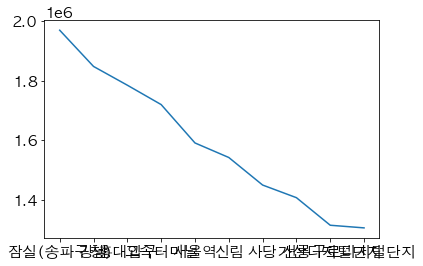

In [40]:
plt.plot(top10_station['역명'], top10_station['총합산승객수'])

In [41]:
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
0,20220301,1호선,서울역,20994.0,19468.0,40462.0
1,20220301,1호선,시청,12439.0,12379.0,24818.0
2,20220301,1호선,종각,15750.0,13544.0,29294.0
3,20220301,1호선,종로3가,16349.0,14533.0,30882.0
4,20220301,1호선,종로5가,14036.0,13472.0,27508.0
...,...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0,590.0
590,20220315,중앙선,양평,2417.0,2473.0,4890.0
591,20220315,중앙선,원덕,330.0,330.0,660.0
592,20220315,중앙선,용문,2820.0,2778.0,5598.0


In [42]:
# 호선별 이용자수 추출

filt = df['호선명'].str.contains('1')
df[filt]

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
0,20220301,1호선,서울역,20994.0,19468.0,40462.0
1,20220301,1호선,시청,12439.0,12379.0,24818.0
2,20220301,1호선,종각,15750.0,13544.0,29294.0
3,20220301,1호선,종로3가,16349.0,14533.0,30882.0
4,20220301,1호선,종로5가,14036.0,13472.0,27508.0
...,...,...,...,...,...,...
464,20220315,공항철도 1호선,운서,6071.0,6193.0,12264.0
465,20220315,공항철도 1호선,공항화물청사,2267.0,2355.0,4622.0
466,20220315,공항철도 1호선,인천공항1터미널,3116.0,3563.0,6679.0
467,20220315,공항철도 1호선,인천공항2터미널,1959.0,1939.0,3898.0


In [43]:
df1 = df[filt]
df1

,사용일자,호선명,역명,승차총승객수,하차총승객수,총합산승객수
0,20220301,1호선,서울역,20994.0,19468.0,40462.0
1,20220301,1호선,시청,12439.0,12379.0,24818.0
2,20220301,1호선,종각,15750.0,13544.0,29294.0
3,20220301,1호선,종로3가,16349.0,14533.0,30882.0
4,20220301,1호선,종로5가,14036.0,13472.0,27508.0
...,...,...,...,...,...,...
464,20220315,공항철도 1호선,운서,6071.0,6193.0,12264.0
465,20220315,공항철도 1호선,공항화물청사,2267.0,2355.0,4622.0
466,20220315,공항철도 1호선,인천공항1터미널,3116.0,3563.0,6679.0
467,20220315,공항철도 1호선,인천공항2터미널,1959.0,1939.0,3898.0


In [44]:
df1 = df1.loc[df1['총합산승객수'] >= 40000][['호선명', '역명', '총합산승객수']]
df1

,호선명,역명,총합산승객수
0,1호선,서울역,40462.0
0,1호선,서울역,40462.0
0,1호선,서울역,70186.0
1,1호선,시청,40298.0
2,1호선,종각,59661.0
3,1호선,종로3가,41620.0
4,1호선,종로5가,40567.0
0,1호선,서울역,70480.0
2,1호선,종각,62304.0
3,1호선,종로3가,42657.0


In [47]:
df1 = df1.sort_values(by=['총합산승객수'], ascending = False)
df1

,호선명,역명,총합산승객수
0,1호선,서울역,78167.0
0,1호선,서울역,76883.0
0,1호선,서울역,72678.0
0,1호선,서울역,70480.0
0,1호선,서울역,70186.0
0,1호선,서울역,69852.0
0,1호선,서울역,69822.0
0,1호선,서울역,68136.0
0,1호선,서울역,67468.0
2,1호선,종각,64085.0


In [ ]:
# 1위 서울역 (78167)
# 2위 종각 (64085)
# 3위 시청 (55177)
# 4위 종로3가 (45073)
# 5위 종로5가 (41576)
# *중복제외*

In [46]:
import matplotlib.pyplot as plt

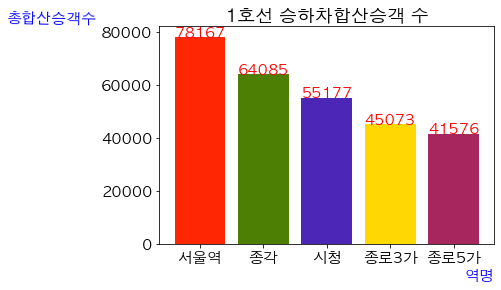

In [184]:
labels = ['서울역', '종각', '시청', '종로3가', '종로5가']
values = [78167, 64085, 55177, 45073,41576]

bar = plt.bar(labels, values)
plt.title('1호선 승하차합산승객 수')
plt.bar(labels,values)
plt.xlabel('역명', color = 'blue',loc = 'right')
plt.ylabel('총합산승객수', color = 'blue',loc = 'top', rotation = -1)
colors = ['red', 'g','b','yellow','purple']
plt.bar(labels,values,color = colors, alpha = 0.7)

for idx, rect in enumerate(bar): #idx=[0, 1, 2] #rect = 각 bar에 대한 크기,위치 정보를 가지고있음
    plt.text(idx, rect.get_height() + 1.4 , values[idx] , ha = 'center', color = 'red') 


In [132]:
import urllib.request 
import json 
import pandas as pd 
from pandas.io.json import json_normalize

In [133]:
url = "http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/20220301"

In [134]:
response = urllib.request.urlopen("http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/20220301") 
json_str = response.read().decode("utf-8")

In [135]:
json_object = json.loads(json_str)

In [136]:
json_object

{'CardSubwayStatsNew': {'list_total_count': 593,
  'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'},
  'row': [{'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '서울역',
    'RIDE_PASGR_NUM': 20994.0,
    'ALIGHT_PASGR_NUM': 19468.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '시청',
    'RIDE_PASGR_NUM': 12439.0,
    'ALIGHT_PASGR_NUM': 12379.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종각',
    'RIDE_PASGR_NUM': 15750.0,
    'ALIGHT_PASGR_NUM': 13544.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종로3가',
    'RIDE_PASGR_NUM': 16349.0,
    'ALIGHT_PASGR_NUM': 14533.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'SUB_STA_NM': '종로5가',
    'RIDE_PASGR_NUM': 14036.0,
    'ALIGHT_PASGR_NUM': 13472.0,
    'WORK_DT': '20220304'},
   {'USE_DT': '20220301',
    'LINE_NUM': '1호선',
    'S

In [137]:
df=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
df

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20220301,1호선,서울역,20994.0,19468.0,20220304
1,20220301,1호선,시청,12439.0,12379.0,20220304
2,20220301,1호선,종각,15750.0,13544.0,20220304
3,20220301,1호선,종로3가,16349.0,14533.0,20220304
4,20220301,1호선,종로5가,14036.0,13472.0,20220304
...,...,...,...,...,...,...
588,20220301,중앙선,오빈,189.0,176.0,20220304
589,20220301,중앙선,양평,1515.0,1442.0,20220304
590,20220301,중앙선,원덕,185.0,192.0,20220304
591,20220301,중앙선,용문,1286.0,1181.0,20220304


In [138]:
dt_index = pd.date_range(start='20220301', end='20220315')
dt_index

DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15'],
              dtype='datetime64[ns]', freq='D')

In [139]:
dt_list = dt_index.strftime("%Y%m%d").tolist()
dt_list

['20220301',
 '20220302',
 '20220303',
 '20220304',
 '20220305',
 '20220306',
 '20220307',
 '20220308',
 '20220309',
 '20220310',
 '20220311',
 '20220312',
 '20220313',
 '20220314',
 '20220315']

In [140]:
dt_index = pd.date_range(start='20220301', end='20220315')
dt_list = dt_index.strftime("%Y%m%d").tolist()

for i in dt_list:
    url="http://openapi.seoul.go.kr:8088/4a514a446c62696b313132665a4c436c/json/CardSubwayStatsNew/1/1000/" + i
    response = urllib.request.urlopen(url) 
    json_str = response.read().decode("utf-8")
    json_object = json.loads(json_str)
    df_temp=pd.json_normalize(json_object['CardSubwayStatsNew']['row'])
    df=df.append(df_temp)

In [141]:
df.columns = ['사용일자', '호선명', '역명', '승차총승객수', '하차총승객수', '등록일자']
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20220301,1호선,서울역,20994.0,19468.0,20220304
1,20220301,1호선,시청,12439.0,12379.0,20220304
2,20220301,1호선,종각,15750.0,13544.0,20220304
3,20220301,1호선,종로3가,16349.0,14533.0,20220304
4,20220301,1호선,종로5가,14036.0,13472.0,20220304
...,...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0,20220318
590,20220315,중앙선,양평,2417.0,2473.0,20220318
591,20220315,중앙선,원덕,330.0,330.0,20220318
592,20220315,중앙선,용문,2820.0,2778.0,20220318


In [142]:
df['총합산승객수'] = df['승차총승객수'] + df['하차총승객수']
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자,총합산승객수
0,20220301,1호선,서울역,20994.0,19468.0,20220304,40462.0
1,20220301,1호선,시청,12439.0,12379.0,20220304,24818.0
2,20220301,1호선,종각,15750.0,13544.0,20220304,29294.0
3,20220301,1호선,종로3가,16349.0,14533.0,20220304,30882.0
4,20220301,1호선,종로5가,14036.0,13472.0,20220304,27508.0
...,...,...,...,...,...,...,...
589,20220315,중앙선,오빈,296.0,294.0,20220318,590.0
590,20220315,중앙선,양평,2417.0,2473.0,20220318,4890.0
591,20220315,중앙선,원덕,330.0,330.0,20220318,660.0
592,20220315,중앙선,용문,2820.0,2778.0,20220318,5598.0


In [143]:
filt = df['호선명'].str.contains('1')
df[filt]

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자,총합산승객수
0,20220301,1호선,서울역,20994.0,19468.0,20220304,40462.0
1,20220301,1호선,시청,12439.0,12379.0,20220304,24818.0
2,20220301,1호선,종각,15750.0,13544.0,20220304,29294.0
3,20220301,1호선,종로3가,16349.0,14533.0,20220304,30882.0
4,20220301,1호선,종로5가,14036.0,13472.0,20220304,27508.0
...,...,...,...,...,...,...,...
464,20220315,공항철도 1호선,운서,6071.0,6193.0,20220318,12264.0
465,20220315,공항철도 1호선,공항화물청사,2267.0,2355.0,20220318,4622.0
466,20220315,공항철도 1호선,인천공항1터미널,3116.0,3563.0,20220318,6679.0
467,20220315,공항철도 1호선,인천공항2터미널,1959.0,1939.0,20220318,3898.0


In [144]:
df = df[filt]
df

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자,총합산승객수
0,20220301,1호선,서울역,20994.0,19468.0,20220304,40462.0
1,20220301,1호선,시청,12439.0,12379.0,20220304,24818.0
2,20220301,1호선,종각,15750.0,13544.0,20220304,29294.0
3,20220301,1호선,종로3가,16349.0,14533.0,20220304,30882.0
4,20220301,1호선,종로5가,14036.0,13472.0,20220304,27508.0
...,...,...,...,...,...,...,...
464,20220315,공항철도 1호선,운서,6071.0,6193.0,20220318,12264.0
465,20220315,공항철도 1호선,공항화물청사,2267.0,2355.0,20220318,4622.0
466,20220315,공항철도 1호선,인천공항1터미널,3116.0,3563.0,20220318,6679.0
467,20220315,공항철도 1호선,인천공항2터미널,1959.0,1939.0,20220318,3898.0


In [145]:
df = df.loc[df['총합산승객수'] >= 40000][['역명','승차총승객수','하차총승객수', '총합산승객수']]
df

,역명,승차총승객수,하차총승객수,총합산승객수
0,서울역,20994.0,19468.0,40462.0
0,서울역,20994.0,19468.0,40462.0
0,서울역,35974.0,34212.0,70186.0
1,시청,20111.0,20187.0,40298.0
2,종각,30162.0,29499.0,59661.0
3,종로3가,21817.0,19803.0,41620.0
4,종로5가,20566.0,20001.0,40567.0
0,서울역,35847.0,34633.0,70480.0
2,종각,31468.0,30836.0,62304.0
3,종로3가,22398.0,20259.0,42657.0


In [146]:
df = df.sort_values(by=['총합산승객수'], ascending = False)
df

,역명,승차총승객수,하차총승객수,총합산승객수
0,서울역,40023.0,38144.0,78167.0
0,서울역,39094.0,37789.0,76883.0
0,서울역,37193.0,35485.0,72678.0
0,서울역,35847.0,34633.0,70480.0
0,서울역,35974.0,34212.0,70186.0
0,서울역,35599.0,34253.0,69852.0
0,서울역,35453.0,34369.0,69822.0
0,서울역,34864.0,33272.0,68136.0
0,서울역,34426.0,33042.0,67468.0
2,종각,32567.0,31518.0,64085.0


In [ ]:
### 승차총승객수 , 하차총승객수 , 총합산승객수 각각 비교해보기

In [ ]:
# 승차총승객수 Top5 station : 서울역, 종각, 시청, 종로3가, 종로5가
# 하차총승객수 Top5 station : 서울역, 종각, 시청, 종로3가, 종로5가
# 총합산승객수 Top5 station : 위와 동일

In [147]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['font.size'] = 15 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False #한글폰트 사용시, 마이너스 글자가 꺠지는 현상을 방지

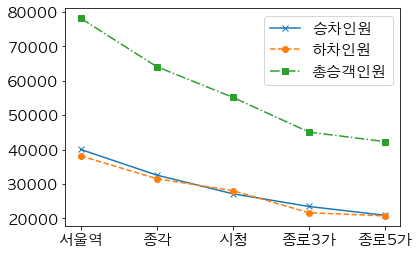

In [157]:
station = ['서울역', '종각', '시청', '종로3가', '종로5가']
승차인원 = [40023, 32567, 27134, 23442, 20876]
하차인원 = [38144, 31518, 28043, 21631, 20700]
총승객인원 = [78167, 64085, 55177, 45073, 42292]

plt.plot(station, 승차인원, label = '승차인원',marker = 'x')
plt.plot(station, 하차인원, label = '하차인원', marker = 'o',ls = '--' )
plt.plot(station, 총승객인원, label = '총승객인원',marker='s', ls = '-.')
plt.legend()

In [176]:
a = [40023, 32567, 27134, 23442, 20876]
b = [38144, 31518, 28043, 21631, 20700]
c = [78167, 64085, 55177, 45073, 42292]
station = ['서울역', '종각', '시청', '종로3가', '종로5가']

df = pd.DataFrame({'역명': station, '승차인원' : a, '하차인원' : b, '총승객인원' : c}, index = station)
df

,역명,승차인원,하차인원,총승객인원
서울역,서울역,40023,38144,78167
종각,종각,32567,31518,64085
시청,시청,27134,28043,55177
종로3가,종로3가,23442,21631,45073
종로5가,종로5가,20876,20700,42292


In [177]:
import matplotlib.pyplot as plt
import numpy as np

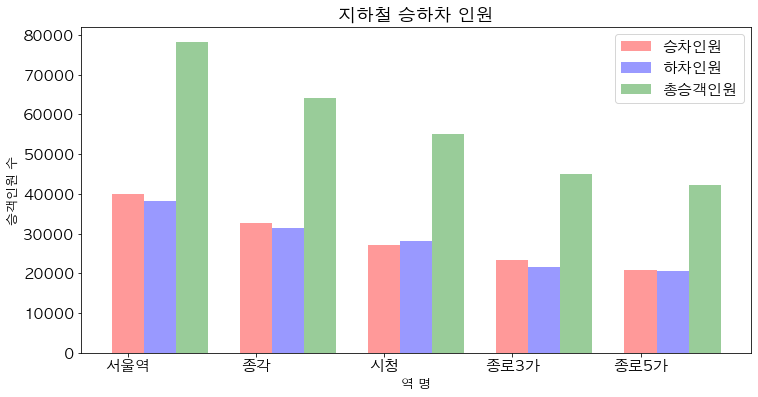

In [186]:
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

#그래프 제목
plt.title('지하철 승하차 인원')

# 역이 5개이므로 0, 1, 2, 3 , 4 위치를 기준으로 삼음
index = np.arange(5)

# 각 역 별로 5개의 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, df['승차인원'], bar_width, alpha=0.4, color='red', label='승차인원')
b2 = plt.bar(index + bar_width, df['하차인원'], bar_width, alpha=0.4, color='blue', label='하차인원')
b3 = plt.bar(index + 2 * bar_width, df['총승객인원'], bar_width, alpha=0.4, color='green', label='총승객인원')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 year 정보와 매칭
#plt.xticks(np.arange(bar_width, 4 + bar_width, 1), station)
plt.xticks(index, df['역명'])

# x축, y축 이름 및 범례 설정
plt.xlabel('역 명', size = 13)
plt.ylabel('승객인원 수',size = 13)
plt.legend()
plt.show()